In [1170]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
import cv2
from scipy.ndimage import zoom
from scipy.signal import savgol_filter

In [1171]:
name1="Materiales/AireMu.txt"
name2="Materiales/PMMAMu.txt"
name3="Materiales/AguaMu.txt"
MaterialAire = np.genfromtxt(name1)
MaterialPMMA = np.genfromtxt(name2)
MaterialAgua = np.genfromtxt(name3)

In [1172]:
nameP="AngiografiaR"
nameM="EI"
nameV="28kVp"
nameF="FilterAl"
nameD="Dist1"
nameTP="PlaqueI"
nameDa="PData"
name00=nameP+"/"+nameM+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+nameDa+"/IPC.txt"
name01=nameP+"/"+nameM+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+nameDa+"/IPCC.txt"

Phase retrieval-Beltran

In [1173]:
E=23 #28kVp #Promedio
#E=27 #38kVp
#E=30 #48kVp
#E=35 #58kVp
#E=37 #68kVp
#E=39 #78kVp
z=0.1922 #Dist1
#z=0.6 #Dist2
#z=1.2 #Dist3
zs=0.6
M=(z+zs)/zs
W=55*(10**(-6))
Am1=10*10**(-6)
PDith=7
Npixeles=256
###############################################
delta_muestra1=MaterialPMMA[E-1][1] # PMMA
mu_muestra1=MaterialPMMA[E-1][0]
delta_muestra2=MaterialAire[E-1][1] # Aire
mu_muestra2=MaterialAire[E-1][0]
delta_m1=MaterialAgua[E-1][1] # Agua
mu_m1=MaterialAgua[E-1][0]
#############################################
delta_rel2=(delta_muestra2-delta_muestra1) 
mu_rel2=(mu_muestra2-mu_muestra1)
s=0
x=np.arange(0,Npixeles,1)
xx=np.arange(0,(Npixeles/2)*PDith,1)
x_J = np.multiply(x,(W*(10**(3)))/PDith)
xL=np.arange(0,int(((Npixeles)/2)*PDith),90)
xJ = np.multiply(xL,np.round(2/PDith,1))
labelsx=xL.tolist()
labelsy=[int(i) for i in xJ]

In [1174]:
def OEsp0(name, W, a, delta, mu, z, M, ss, Dx):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    u=np.fft.fftshift(np.fft.fftfreq(name.shape[1], 2*W))
    v=np.fft.fftshift(np.fft.fftfreq(name.shape[0], W))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (1/Dx)*np.sin(2*np.pi*Dx*uu)
    gg=complex(0,1)
    B=(2*delta*z*gg)/(M*a*mu) 
    Q=1-B*freq_matrix
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=-(1/(mu))*np.log(img_back)
    return A1

In [1175]:
def OEsp1(name, W, a, delta, mu, z, M, ss, Dx):
    frr = np.fft.fftshift(np.fft.fft2(name))  
    u=np.fft.fftshift(np.fft.fftfreq(name.shape[1], 2*W))
    v=np.fft.fftshift(np.fft.fftfreq(name.shape[0], W))
    uu, vv = np.meshgrid(u, v)
    freq_matrix = (1/Dx)*np.sin(2*np.pi*Dx*uu)
    gg=complex(0,1)
    B=(2*delta*z*gg)/(M*a*mu) 
    Q=1+B*freq_matrix
    QQ=(Q)/(Q**2+ss)
    A=QQ*frr
    img_back = np.fft.ifft2(np.fft.ifftshift(A)).real 
    A1=-(1/(mu))*np.log(img_back)
    return A1

In [1176]:
def func(x,r,PosX):
    k=np.sqrt(r**2 - ((PosX-x))**2)
    return k

In [1177]:
def TubR(X1,X2,Npixeles,PDith):
    Thick=np.zeros((Npixeles,int(Npixeles/2)*PDith))
    E=np.concatenate((np.zeros(X1),2*func(xx[X1:X2],(X2-X1)/2,(X1+X2)/2),np.zeros(int(Npixeles/2)*PDith-X2)))
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [1178]:
def TubRL(X1,X2,Npixeles,PDith):
    Thick=np.zeros((Npixeles,int(Npixeles/2)*PDith))
    E=2*func(xx[X1:X2],(X2-X1)/2,(X1+X2)/2)
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [1179]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [1180]:
X1=118 #Internal Dist1
X2=140
X3=-592 #External Dist1
X4=848
#X1=111 #Internal Dist2
#X2=145
#X3=-963 #External Dist2
#X4=1219
#X1=102 #Internal Dist3
#X2=154
#X3=-1508 #External Dist3
#X4=1764
Tm1=TubR(int(X1*(PDith/2)),int(X2*(PDith/2)),Npixeles,PDith)
Tm2=TubRL(int(X3*(PDith/2)),int(X4*(PDith/2)),Npixeles,PDith)
TestEsC1=(PI(Tm1,0,Tm1.shape[0],0,Tm1.shape[1]))/(np.max(Tm1))*0.92*10**(-3)
TestEsC2=(PI(Tm2,0,Tm2.shape[0],0,Tm2.shape[1]))/(np.max(Tm2))*60*10**(-3)

In [1181]:
RAWCN0= np.genfromtxt(name00)
RAWCN1= np.genfromtxt(name01)
Factor = RAWCN0.shape[1] / RAWCN0.shape[0]
RAWCNS0= zoom(RAWCN0, (Factor, 1))
RAWCNS1= zoom(RAWCN1, (Factor, 1))

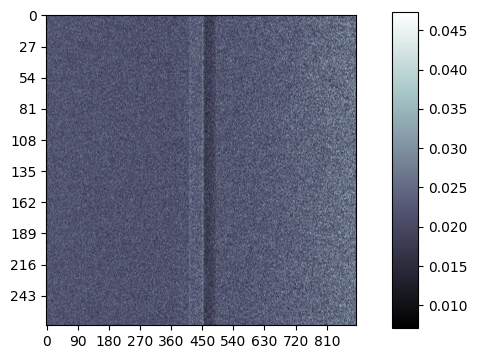

In [1182]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(RAWCNS0, cmap="bone")
plt.xticks(xL,labelsx)
plt.yticks(xL,labelsy)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

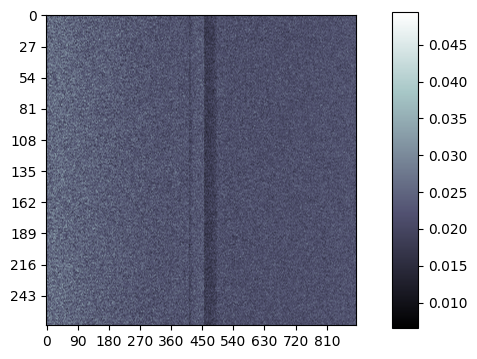

In [1183]:
fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(RAWCNS1, cmap="bone")
plt.xticks(xL,labelsx)
plt.yticks(xL,labelsy)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

In [1184]:
PIRAWCN0=PI(RAWCN0,0,RAWCN0.shape[0],0,RAWCN0.shape[1])
PIRAWCN1=PI(RAWCN1,0,RAWCN1.shape[0],0,RAWCN1.shape[1])

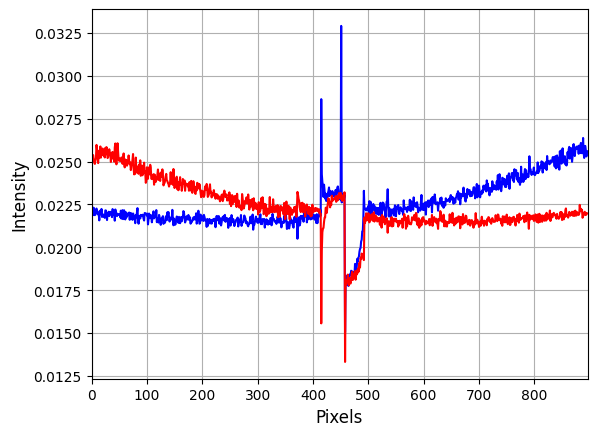

In [1185]:
fig,ax=plt.subplots()
plt.plot(PIRAWCN0, linestyle="-",color="blue",label="Odd")
plt.plot(PIRAWCN1, linestyle="-",color="red",label="Even")
#plt.plot(PILB, linestyle="--",color="green",label="Theoretical",linewidth = 2.5)
plt.ylabel("Intensity",fontsize=12)
plt.xlabel("Pixels",fontsize=12)
plt.grid()
plt.xlim(0,RAWCN0.shape[1])
plt.xticks(np.arange(0,RAWCN0.shape[1], 100))
#plt.legend(loc=0, fontsize=10.5)
plt.show()

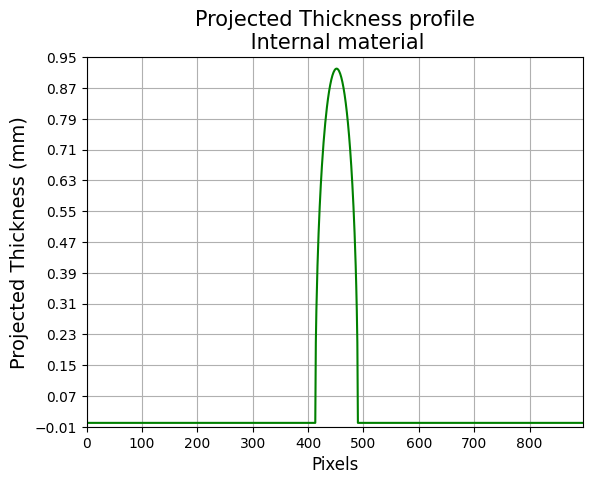

In [1192]:
fig,ax=plt.subplots()
plt.plot(TestEsC1*1000, '-', color="green")
plt.title("Projected Thickness profile\n Internal material",fontsize=15)
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.xlim(0,RAWCN0.shape[1])
plt.xticks(np.arange(0,RAWCN0.shape[1], 100))
plt.ylim(-0.01,0.95)
plt.yticks(np.arange(-0.01,1, 0.08))
plt.grid()

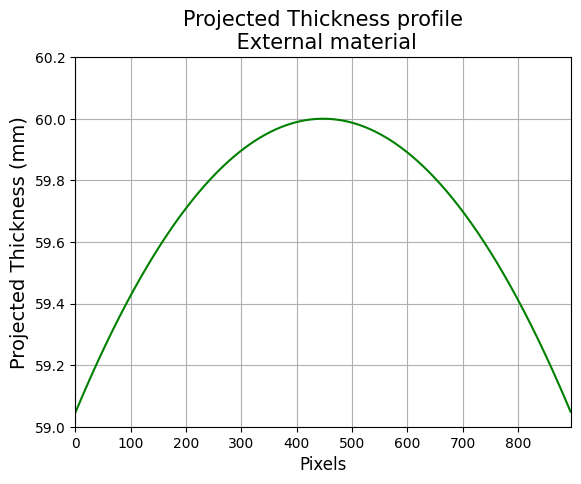

In [1191]:
fig,ax=plt.subplots()
plt.plot(TestEsC2*1000, '-', color="green")
plt.title("Projected Thickness profile\n External material",fontsize=15)
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.xlim(0,RAWCN0.shape[1])
plt.xticks(np.arange(0,RAWCN0.shape[1], 100))
plt.ylim(59,60.2)
plt.yticks(np.arange(59,60.2, 0.2))
plt.grid()

In [1188]:
ORAWC_M0=(RAWCN0)/(np.exp(-mu_muestra1*TestEsC2))
ORAWC_M1=(RAWCN1)/(np.exp(-mu_muestra1*TestEsC2))
OM_RAWC0=(OEsp1(ORAWC_M0, W, Am1, delta_rel2, mu_rel2, z, M, s, 2*W))
OM_RAWC1=(OEsp0(ORAWC_M1, W, Am1, delta_rel2, mu_rel2, z, M, s, 2*W))
OM_RAWC=(OM_RAWC0+OM_RAWC1)/2
OM_RAWCS= zoom(OM_RAWC, (Factor, 1))
OPIMRAWC=PI(OM_RAWC,0,OM_RAWC.shape[0],0,OM_RAWC.shape[1])

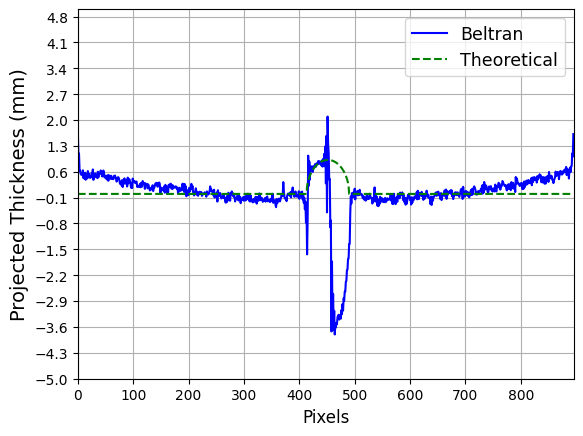

In [1189]:
JJG=0.0116
fig,ax=plt.subplots()
plt.plot((OPIMRAWC+JJG)*1000, color="blue",label="Beltran")
plt.plot(TestEsC1*1000,linestyle="--", color="green",linewidth = 1.5,label="Theoretical")
plt.ylabel("Projected Thickness (mm)",fontsize=14)
plt.xlabel("Pixels",fontsize=12)
plt.grid()
plt.xlim(0,RAWCN0.shape[1])
plt.xticks(np.arange(0,RAWCN0.shape[1], 100))
plt.ylim(-5,5)
plt.yticks(np.arange(-5,5, 0.7))
plt.legend(loc=0,mode = "Expand", ncol=1,fontsize=12.5)

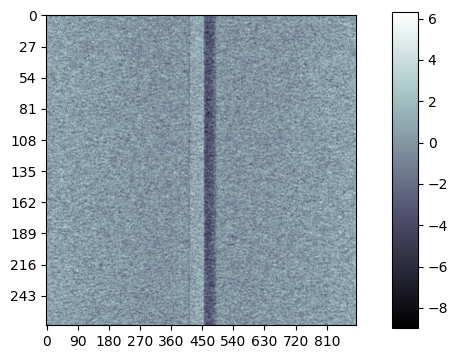

In [1190]:
fig, ax = plt.subplots(figsize=(5,5))
u=ax.imshow((OM_RAWCS+JJG)*1000, cmap="bone")
plt.xticks(xL,labelsx)
plt.yticks(xL,labelsy)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)